In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
df= pd.read_csv('./cardio_train.csv',delimiter=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#preprocessing

#dropping id due to high cardinality
df.drop('id', axis=1, inplace=True)

#columns to apply standard scale on = ['age', 'height','weight','ap_hi','ap_lo']

col_names = ['age', 'height','weight','ap_hi','ap_lo']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

for column in col_names:
    ct = ColumnTransformer([
            ('somename', StandardScaler(), [column])
        ], remainder='passthrough')

    df[column]=ct.fit_transform(df[[column]])

#initalize X with our DataFrame - the label we want to predict
X = df.drop('cardio',axis=1)

# assigning the target label to y 
y = df['cardio'] 

### one-hot encoding our categorical columns
# columns not to transform
not_cols = ['age', 'height','weight','ap_hi','ap_lo']

X = pd.get_dummies(data=X, columns=[col for col in X.columns if col not in not_cols])

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.05)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(66500, 19) (3500, 19) (66500,) (3500,)


In [5]:
X_train.head()


,age,height,weight,ap_hi,ap_lo,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
8475,0.172312,0.078047,-0.708942,-0.057251,-0.088238,1,0,1,0,0,1,0,0,1,0,1,0,0,1
43453,1.498088,0.199849,0.194108,-0.057251,-0.141297,0,1,1,0,0,1,0,0,1,0,0,1,0,1
33950,-0.793952,0.078047,-0.639477,-0.057251,-0.088238,1,0,1,0,0,1,0,0,1,0,1,0,0,1
59329,-1.101179,0.321650,-0.639477,0.007679,-0.141297,0,1,1,0,0,1,0,0,0,1,1,0,0,1
31705,-0.147074,-1.018168,-0.014288,-0.057251,-0.141297,1,0,1,0,0,1,0,0,1,0,1,0,0,1


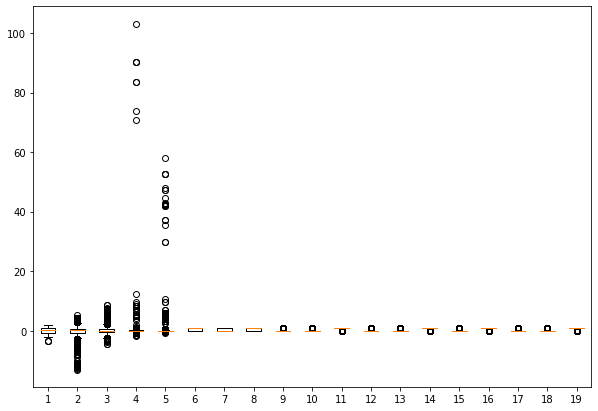

In [20]:
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(X_train)
 
# show plot
plt.show()

In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [7]:
model = Sequential()

model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainabl

In [9]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics= 'accuracy')

In [10]:
model.fit(X_train,y_train, epochs=25, batch_size=32)

Epoch 1/25
2079/2079 [==============================] - 9s 4ms/step - loss: 0.6552 - accuracy: 0.6238
Epoch 2/25
2079/2079 [==============================] - 9s 4ms/step - loss: 0.6297 - accuracy: 0.6544
Epoch 3/25
2079/2079 [==============================] - 9s 4ms/step - loss: 0.6065 - accuracy: 0.6808
Epoch 4/25
2079/2079 [==============================] - 9s 4ms/step - loss: 0.5744 - accuracy: 0.7163
Epoch 5/25
2079/2079 [==============================] - 8s 4ms/step - loss: 0.5635 - accuracy: 0.7244
Epoch 6/25
2079/2079 [==============================] - 10s 5ms/step - loss: 0.5584 - accuracy: 0.7276
Epoch 7/25
2079/2079 [==============================] - 10s 5ms/step - loss: 0.5555 - accuracy: 0.7294
Epoch 8/25
2079/2079 [==============================] - 10s 5ms/step - loss: 0.5528 - accuracy: 0.7310
Epoch 9/25
2079/2079 [==============================] - 11s 5ms/step - loss: 0.5502 - accuracy: 0.7322
Epoch 10/25
2079/2079 [==============================] - 9s 4ms/step - loss: 0

In [11]:
y_hat=model.predict(X_test)
y_hat=[0 if val<0.5 else 1 for val in y_hat]

110/110 [==============================] - 0s 1ms/step


In [12]:
accuracy_score(y_test,y_hat)

0.7188571428571429

In [13]:
#model.save('<nameoffolder>')
#model.load('<nameofmodel>')

In [14]:
model.evaluate(X_test,y_test)

110/110 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7189


[0.5634348392486572, 0.7188571691513062]

In [15]:
import matplotlib.pyplot as plt

accuracy = model['accuracy']
loss = model['loss']

epochs= range(len(accuracy))

plt.plot(epochs,accuracy)
plt.plot(epochs, loss)
#https://www.youtube.com/watch?v=LXc6LpFWCEQ&ab_channel=AKPython

TypeError: 'Sequential' object is not subscriptable